# Linear Models for Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
sklearn.set_config(print_changed_only=True)

In [2]:
from sklearn.linear_model import Ridge, LinearRegression

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
X, y = boston.data, boston.target

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
X.shape

(506, 13)

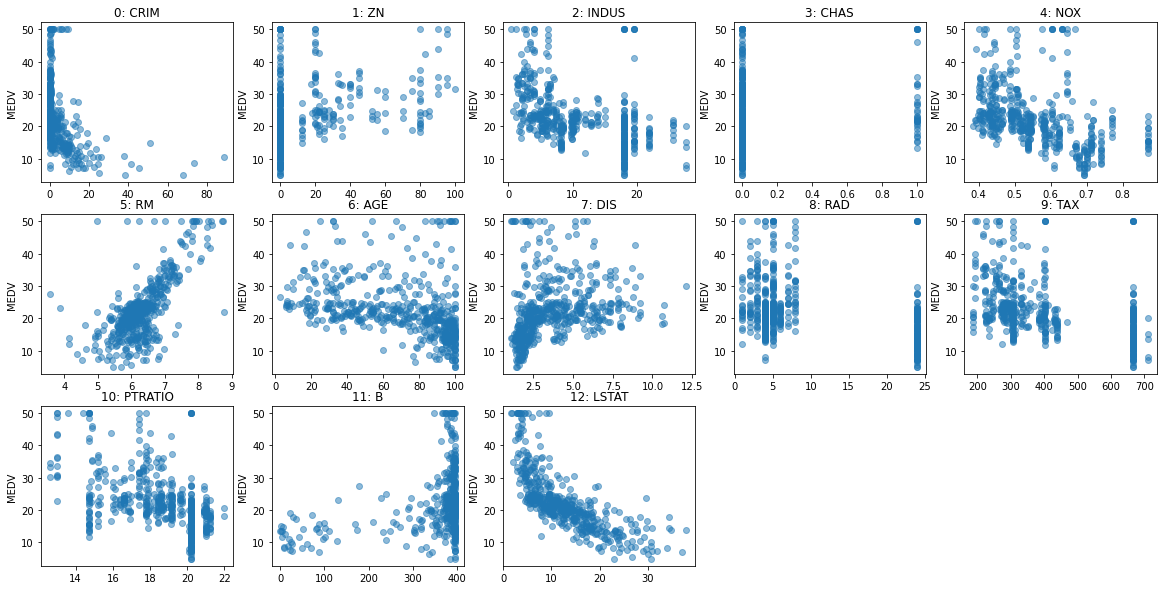

In [8]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [9]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [11]:
np.mean(cross_val_score(LinearRegression(),
                        X_train, y_train, cv=10))

0.7160133196648382

In [12]:
np.mean(cross_val_score(
        Ridge(), X_train, y_train, cv=10))

0.7140510045941365

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}


In [14]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

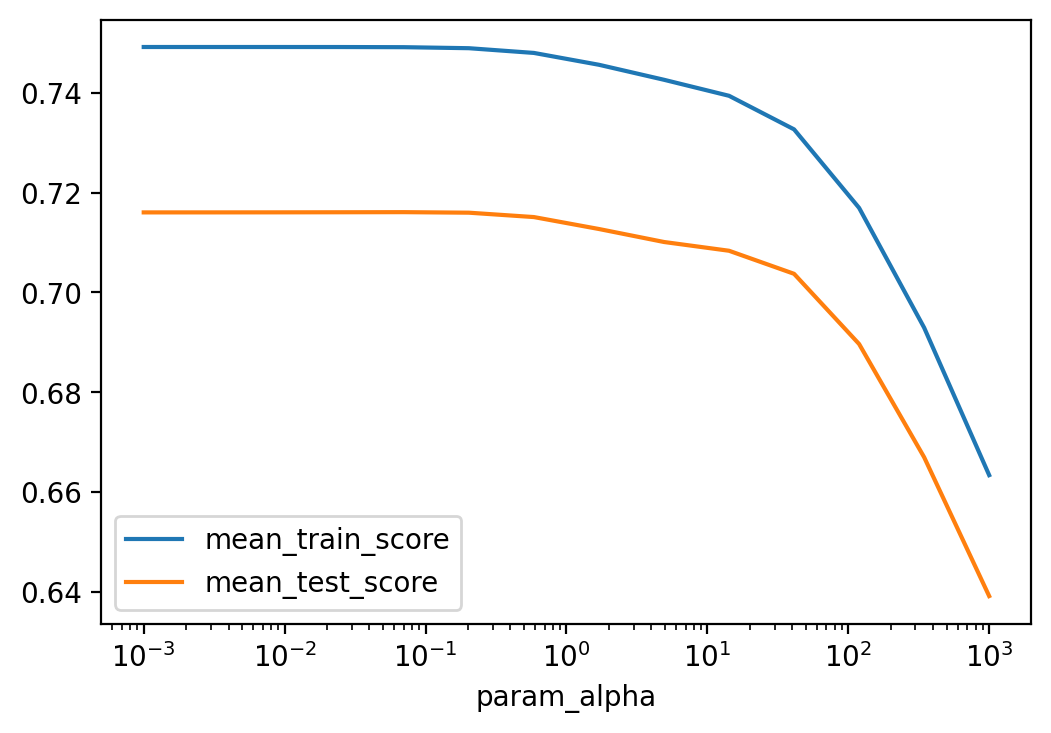

In [15]:
import pandas as pd
plt.figure(dpi=200)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")

In [16]:
from sklearn.preprocessing import PolynomialFeatures, scale
# being lazy and not really doing things properly whoops
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [17]:
np.mean(cross_val_score(LinearRegression(),
                        X_train, y_train, cv=10))

0.8065483746792722

In [18]:
np.mean(cross_val_score(Ridge(),
                        X_train, y_train, cv=10))

0.822709961341871

In [19]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             return_train_score=True)

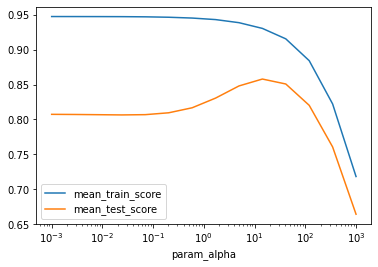

In [20]:
results = pd.DataFrame(grid.cv_results_)

results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 14.251026703029993}
0.8578415451523969


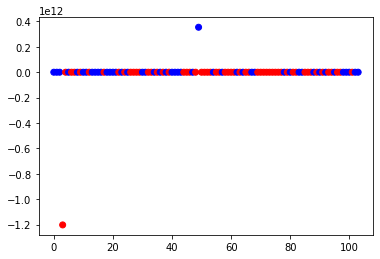

In [22]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

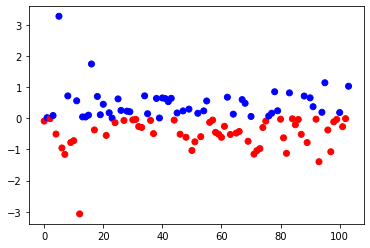

In [23]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

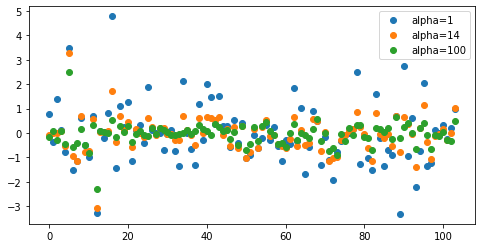

In [24]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.78
Test set score: 0.72
Number of features used: 9


# Exercise
Load the diabetes dataset using ``sklearn.datasets.load_diabetes``. Apply ``LinearRegression``, ``Ridge`` and ``Lasso`` and visualize the coefficients. Try polynomial features.

Linear regression score: 0.44794123964805027
Ridge Regression score: 0.3696182758570121
Linear regression w/ scaling: 0.4479412396480503
Ridge regression w/ scaling: 0.4486637331318105
{'alpha': 10.0} 0.4491933685010686
{'alpha': 1.0} 0.45107227127946564
Linear regression poly features: 0.31310352218882037
Ridge regression poly features: 0.370643562574966
{'alpha': 100.0} 0.4300583776673802


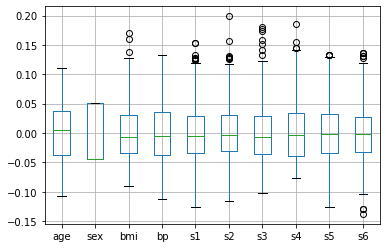

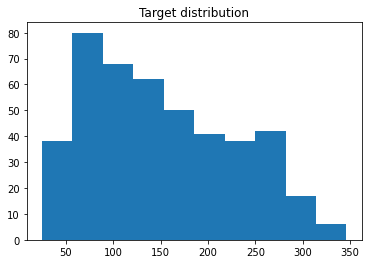

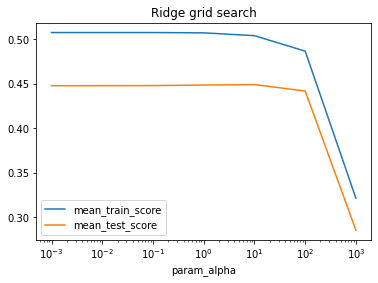

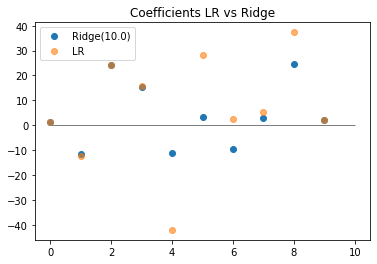

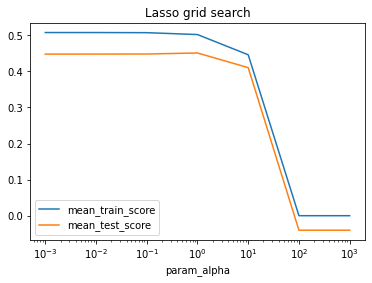

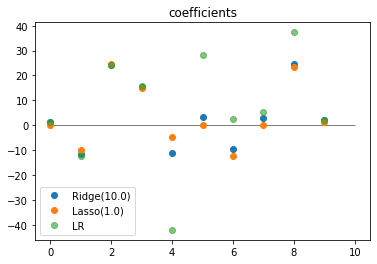

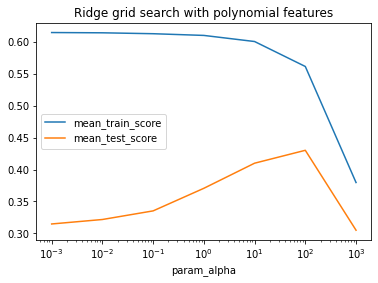

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# create dataframe for easy boxplot
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(diabetes.target, bins="auto")

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target)

scores_lr = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
print("Linear regression score:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train, y_train, cv=10)
print("Ridge Regression score:", scores_ridge.mean())

# With scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
print("Linear regression w/ scaling:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Ridge regression w/ scaling:", scores_ridge.mean())

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")


print(grid.best_params_, grid.best_score_)

lr = LinearRegression().fit(X_train_scaled, y_train)

plt.figure()
plt.title("Coefficients LR vs Ridge")
plt.hlines(0, 0, X_train.shape[1], linewidth=.5)
plt.plot(grid.best_estimator_.coef_, 'o', label="Ridge({})".format(grid.best_params_['alpha']))
plt.plot(lr.coef_, 'o', label="LR", alpha=.6)
plt.legend()

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_lasso = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_lasso.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid_lasso.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Lasso grid search")
print(grid_lasso.best_params_, grid_lasso.best_score_)

plt.figure()
plt.title("coefficients")
plt.hlines(0, 0, X_train.shape[1], linewidth=.5)
plt.plot(grid.best_estimator_.coef_, 'o', label="Ridge({})".format(grid.best_params_['alpha']))
plt.plot(grid_lasso.best_estimator_.coef_, 'o', label="Lasso({})".format(grid_lasso.best_params_['alpha']))
plt.plot(lr.coef_, 'o', label="LR", alpha=.6)
plt.legend()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

scores_lr = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=10)
print("Linear regression poly features:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_poly, y_train, cv=10)
print("Ridge regression poly features:", scores_ridge.mean())

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_poly, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search with polynomial features")


print(grid.best_params_, grid.best_score_)
# score with polynomial features is worse!